## SNR estimation

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.special import jv, kv, jvp, kvp
from scipy.optimize import root_scalar
from scipy.constants import c

nm = 1e-9
um = 1e-6
mm = 1e-3

plt.rc('text', usetex = True)
plt.rc('font', size = 8)
plt.rcParams['xtick.major.size'] = 2.
plt.rcParams['ytick.major.size'] = 2.
plt.rcParams['xtick.major.pad'] = 2.
plt.rcParams['ytick.major.pad'] = 2.
plt.rcParams['axes.labelpad'] = 2
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['figure.dpi'] = 500

In [10]:
n_air = 1.0
def n_silica(wavelength):
    """ Refractive index of silica using the Sellmeier formula """
    wavelength /= um # Wavelength in unit of um
    return np.sqrt(1 + ((0.6961663 * wavelength**2)/((wavelength**2)-(0.0684043)**2)) \
                   + ((0.4079426 * wavelength**2) / ((wavelength**2) - (0.1162414)**2))\
                      + ((0.8974794 * wavelength**2)/(wavelength**2 - (9.896161)**2)))

In [ ]:
def P_exp(distance, dia): # distance in nm
    P_0 = 75 # Initial power at r = 100 nm in nW
    sigma = -(100 - dia) / np.log(P_0)
    return np.exp(-(distance - dia) / sigma)

In [11]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False     # force-disable usetex globally
mpl.rcParams['axes.unicode_minus'] = False  # nicer minus sign on Windows

def beta(diameter, wavelength):
    """ Obtain the propagation constant beta by solving the eigenvalue equation """
    """ beta in unit of rad/m"""

    k0 = 2 * np.pi / wavelength  # Wavenumber in vacuum
    n_fiber = n_silica(wavelength)
    
    def eigenvalue_eq(beta):
        if beta > k0 * n_fiber or beta < k0 * n_air:
            return np.inf
        
        u = (diameter / 2) * np.sqrt(k0**2 * n_fiber**2 - beta**2)
        w = (diameter / 2) * np.sqrt(beta**2 - k0**2 * n_air**2)
        
        if u <= 0 or w <= 0:
            return np.inf
        
        lhs = ((1/u**2) + (1/w**2)) * ((1/u**2)+((n_air**2 / n_fiber**2) * (1/w**2)))
        rhs = (((1 / u) * (jvp(1, u) / jv(1, u))) + ((1 / w) * (kvp(1, w) / kv(1, w)))) * \
              (((1 / u) * (jvp(1, u) / jv(1, u))) + ((n_air**2 / n_fiber**2) * (1 / w) * (kvp(1, w) / kv(1, w))))
        return lhs - rhs
    
    beta_min = k0 * n_air + 10
    beta_max = k0 * n_fiber - 10
    
    if eigenvalue_eq(beta_min) * eigenvalue_eq(beta_max) > 0:
        return np.nan
    
    try:
        sol = root_scalar(eigenvalue_eq, bracket=[beta_min, beta_max], method='brentq', xtol=1e-6)
        return sol.root if sol.converged else np.nan
    except ValueError:
        return np.nan
    
def pitch(diameter, wavelength):
    """ Intensity standing-wave pitch """
    return np.pi/beta(diameter, wavelength)

In [12]:
def E(wavelength, r, phi, z, t):
    k0 = 2*np.pi/wavelength
    omega = 2*np.pi*c/wavelength
    n_fiber = n_silica(wavelength)
    b = beta(diameter, wavelength)
    a = diameter/2

    h11 = np.sqrt(k0**2 * n_fiber**2 -  b**2)
    q11 = np.sqrt(b**2 - k0**2 * n_air**2)
    s11 = (1/(h11*a)**2 + 1/(q11*a)**2) / (jvp(1, h11*a)/(h11*a*jv(1, h11*a)) + kvp(1, q11*a)/(q11*a*kv(1, q11*a)))

    Ex = A * b * jv(1, h11 * a) / (2 * q11 * kv(1, q11 * a)) * ((1 - s11) * kv(0, q11 * r) * np.cos(phi0) + (1 + s11) * kv(2, q11 * r) * np.cos(2 * phi - phi0)) * np.exp(1j * (omega * t - b * z))
    Ey = A * b * jv(1, h11 * a) / (2 * q11 * kv(1, q11 * a)) * ((1 - s11) * kv(0, q11 * r) * np.sin(phi0) + (1 + s11) * kv(2, q11 * r) * np.sin(2 * phi - phi0)) * np.exp(1j * (omega * t - b * z))
    Ez = 1j * A * jv(1, h11 * a) / kv(1, q11 * a) * kv(1, q11 * r) * np.cos(phi - phi0) * np.exp(1j * (omega * t - b * z))

    Esq = np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2

    return Ex,Ey,Ez,Esq
    

<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:63: SyntaxWarning: invalid escape sequence '\m'
<>:91: SyntaxWarning: invalid escape sequence '\m'
<>:125: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:63: SyntaxWarning: invalid escape sequence '\m'
<>:91: SyntaxWarning: invalid escape sequence '\m'
<>:125: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ItoiJoe\AppData\Local\Temp\ipykernel_40924\1336545370.py:25: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$x$ ($\mu$m)')
C:\Users\ItoiJoe\AppData\Local\Temp\ipykernel_40924\1336545370.py:26: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$y$ ($\mu$m)');
C:\Users\ItoiJoe\AppData\Local\Temp\ipykernel_40924\1336545370.py:62: SyntaxWarning: invalid 

0.06608998541072836 0.1882448092568426


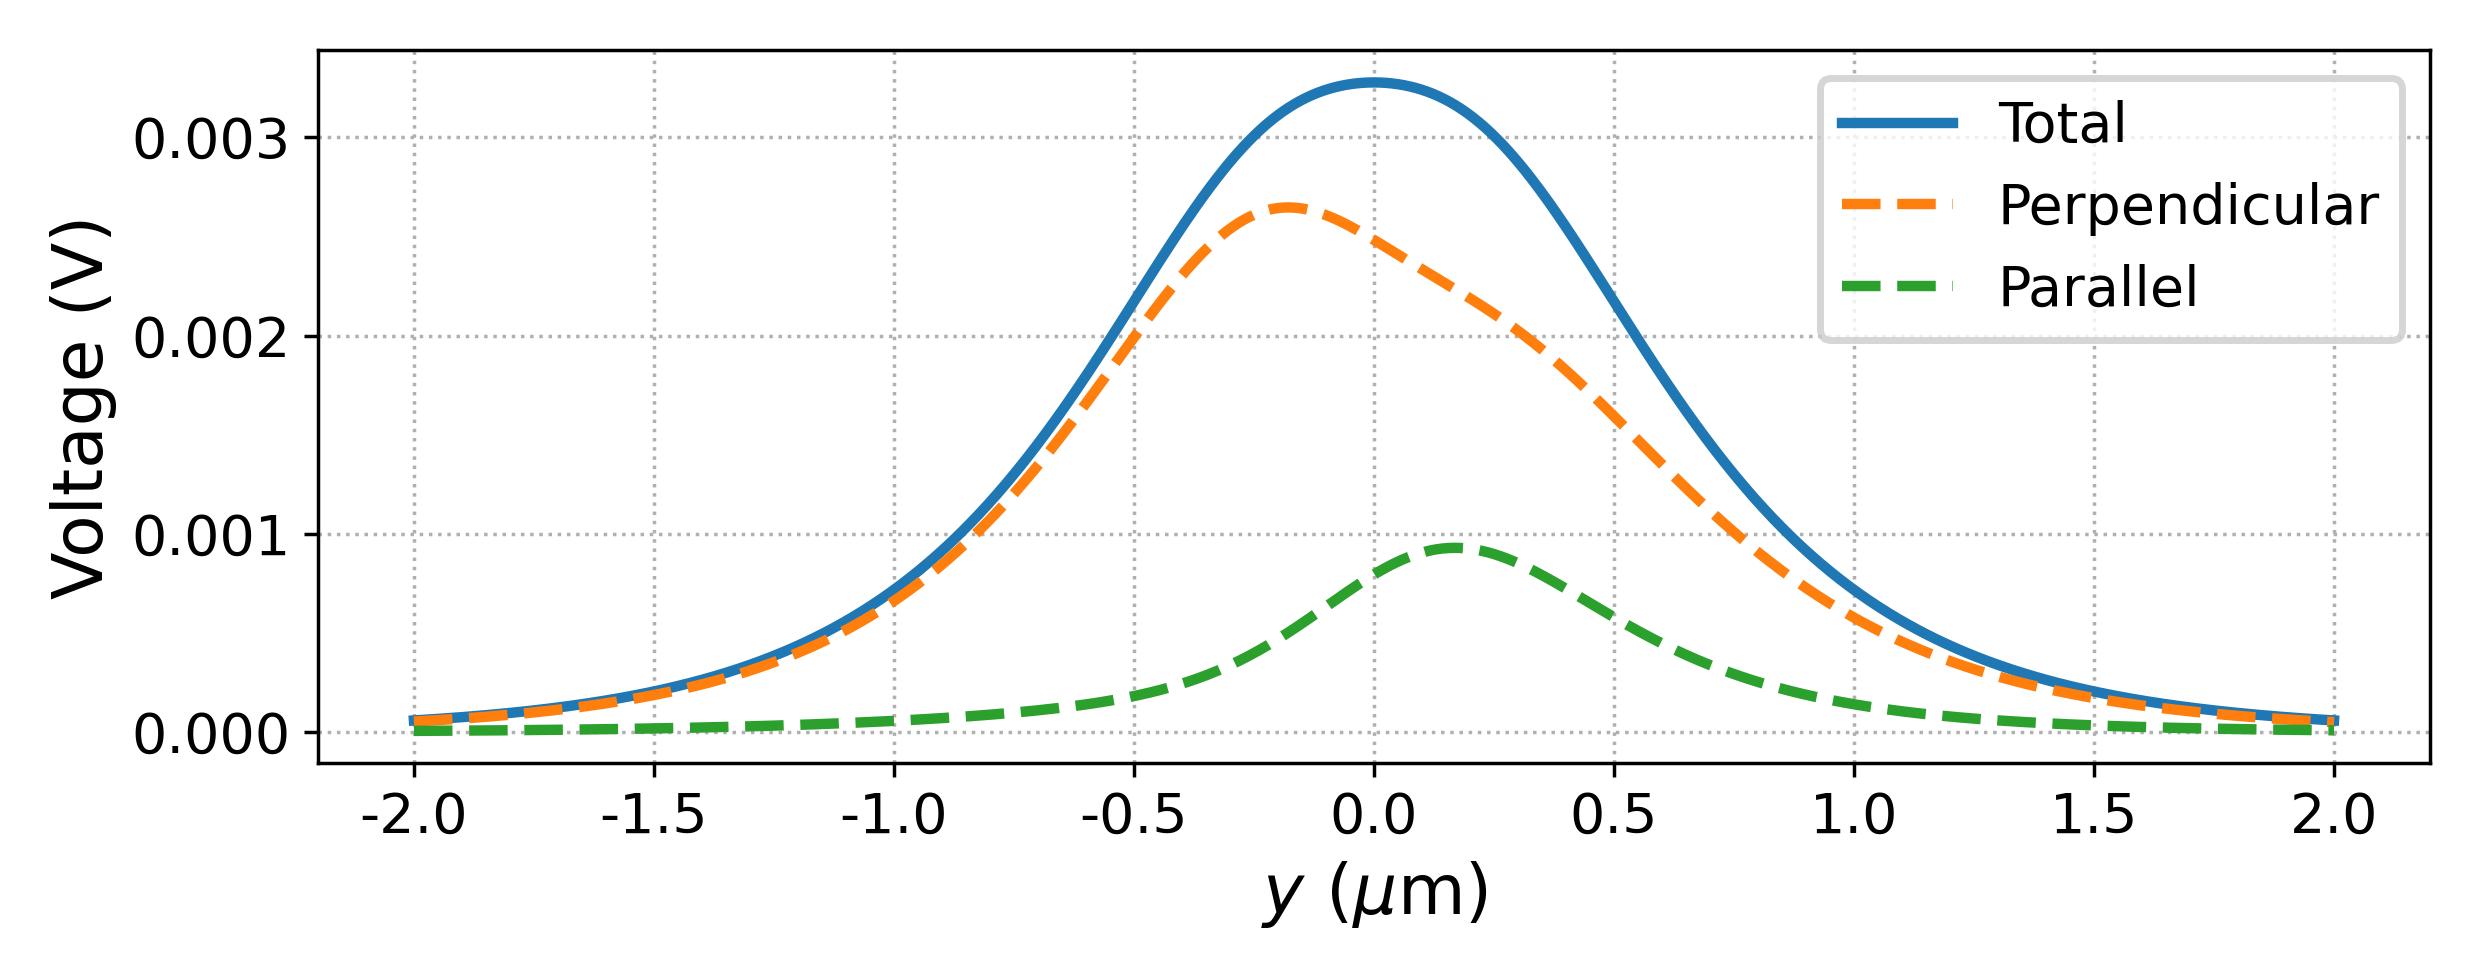

In [121]:
wavelength = 1389*nm
diameter = 550*nm
z = 20
rot_angle = 20 # degree
phi0 = rot_angle*np.pi/180
A = 1

R_max = 2*um
num_points = 1000
x = np.linspace(-R_max, R_max, num_points)
y = np.linspace(-R_max, R_max, num_points)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
PHI = np.arctan2(Y, X)

mask_outside = R >= diameter/2

Etot_sq = np.full(R.shape, np.nan)
Etot_sq[mask_outside] = E(wavelength, R[mask_outside], PHI[mask_outside], z, 0)[-1]

if 0:
    fig,ax = plt.subplots(figsize=(2, 2))
    Eplot = ax.pcolormesh(X/um, Y/um, Etot_sq, shading='auto', cmap='coolwarm', vmin=0)
    ax.set_xlabel('$x$ ($\mu$m)')
    ax.set_ylabel('$y$ ($\mu$m)');

    axpos = ax.get_position()
    cbar_ax = fig.add_axes([0.93, axpos.y0, 0.03, axpos.height])
    cbar = fig.colorbar(Eplot, cbar_ax)
    cbar.set_label('$|E|^2$')

y_sweep = np.linspace(-R_max, R_max, num_points)
x_fixed = 0.6 * um
EyEz_sq_sweep = []

for y_val in y_sweep:
    r_val = np.sqrt(x_fixed**2 + y_val**2)
    phi_val = np.arctan2(y_val, x_fixed)
    
    # Compute Ey and Ez
    _, Ey, Ez, _ = E(wavelength, r_val, phi_val, z, phi0)
    
    # Compute |Ey|^2 + |Ez|^2
    EyEz_sq = np.abs(Ey)**2 + np.abs(Ez)**2
    EyEz_sq_sweep.append(EyEz_sq)

Pol_para_y = y_sweep/um # um
Pol_para = EyEz_sq_sweep 

# The other polarization
phi0 = np.pi/2 + phi0

mask_outside = R >= diameter/2

Etot_sq = np.full(R.shape, np.nan)
Etot_sq[mask_outside] = E(wavelength, R[mask_outside], PHI[mask_outside], z, 0)[-1]

if 0:
    fig,ax = plt.subplots(figsize=(2, 2))
    Eplot = ax.pcolormesh(X/um, Y/um, Etot_sq, shading='auto', cmap='coolwarm', vmin=0)
    ax.set_xlabel('$x$ ($\mu$m)')
    ax.set_ylabel('$y$ ($\mu$m)');

    axpos = ax.get_position()
    cbar_ax = fig.add_axes([0.93, axpos.y0, 0.03, axpos.height])
    cbar = fig.colorbar(Eplot, cbar_ax)
    cbar.set_label('$|E|^2$')

EyEz_sq_sweep = []

for y_val in y_sweep:
    r_val = np.sqrt(x_fixed**2 + y_val**2)
    phi_val = np.arctan2(y_val, x_fixed)
    
    # Compute Ey and Ez
    _, Ey, Ez, _ = E(wavelength, r_val, phi_val, z, phi0)
    
    # Compute |Ey|^2 + |Ez|^2
    EyEz_sq = np.abs(Ey)**2 + np.abs(Ez)**2
    EyEz_sq_sweep.append(EyEz_sq)

Pol_perp_y = y_sweep/um # um
Pol_perp = EyEz_sq_sweep 

# Optionally, plot the result
if 0: 
    plt.figure(figsize=(6, 4))
    plt.plot(Pol_perp_y, Pol_perp, label='Perpendicular')
    plt.plot(Pol_para_y, Pol_para, label='Parallel')
    plt.xlabel('$y$ ($\mu$m)')
    plt.ylabel('$|E_y|^2 + |E_z|^2$')
    plt.grid(True)
    plt.legend()
    plt.show()

# Find max
Pol_para_max = np.max(Pol_para)
Pol_perp_max = np.max(Pol_perp)
print(Pol_para_max, Pol_perp_max)

const_factor = Pol_perp_max/Pol_para_max

# power 
P_light = P_exp(x_fixed*1e9, 550) # nW

# normalize
Pol_para_adjusted = Pol_para/Pol_para_max*P_light/const_factor
Pol_perp_adjusted = Pol_perp/Pol_perp_max*P_light

# Convert to voltage
V_gain = 4.75*1e6
R_V = 0.9 # responsivity
scale_factor = 1  # high impedance setting R_load is <5k Ohm with Rs = 50 Ohm

Pol_perp_V = Pol_perp_adjusted*scale_factor*R_V*V_gain*1e-9
Pol_para_V = Pol_para_adjusted*scale_factor*R_V*V_gain*1e-9

total_voltage = Pol_perp_V + Pol_para_V

plt.figure(figsize=(5, 2))  # Adjusted size
plt.plot(Pol_perp_y, total_voltage, label='Total', linewidth=1.5)  # Thicker line
plt.plot(Pol_perp_y, Pol_perp_V, linestyle='--', label='Perpendicular', linewidth=1.5)
plt.plot(Pol_para_y, Pol_para_V, linestyle='--', label='Parallel', linewidth=1.5)
plt.xlabel('$y$ ($\mu$m)', fontsize=10)  # Smaller font size
plt.ylabel('Voltage (V)', fontsize=10)
plt.grid(True, linestyle=':', linewidth=0.5)  # Dotted grid lines
plt.legend(loc='best', fontsize=8)  # Best location for legend
plt.tight_layout()  # Automatically adjust subplot parameters
plt.show()

## Adding the effect of EOM

In [ ]:
from scipy.interpolate import interp1d

# Interpolate
scan_duration = 0.1 # s
sampling_freq = 20e3 # 20 kHz
total_num = int(scan_duration*sampling_freq)
t = np.linspace(0, scan_duration, total_num)

# Define original time vector for Pol_para_adjusted
original_time = np.linspace(0, scan_duration, len(Pol_para_adjusted))

# Create interpolation function
interpolator = interp1d(original_time, Pol_para_adjusted, kind='linear', fill_value="extrapolate")
interpolator_ = interp1d(original_time, Pol_perp_adjusted, kind='linear', fill_value="extrapolate")
# Interpolate to match the length of total_num
Pol_para_interpolated = interpolator(t)
Pol_perp_interpolated = interpolator_(t)

switch_freq = 10000 # Hz

# Create switching array
switch_period = 1 / switch_freq
half_switch_period = switch_period / 2
switch_array = []

for idx, time_value in enumerate(t):
    # Determine the index based on the half period
    switch_index = int(time_value // half_switch_period)
    # Alternate between 0 and 1 using modulo operation
    if switch_index % 2 == 0:
        switch_array.append(Pol_para_interpolated[idx])
    else:
        switch_array.append(Pol_perp_interpolated[idx])

# Convert to numpy array
switch_array = np.array(switch_array)

# Plot the switching array
plt.figure(figsize=(5, 2))
plt.plot(t, switch_array, label='Switching Array', linewidth=1.5)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Interpolated Value', fontsize=10)
plt.grid(True, linestyle=':', linewidth=0.5)  # Dotted grid lines
plt.legend(loc='best', fontsize=8)  # Best location for legend
plt.tight_layout()  # Automatically adjust subplot parameters
plt.show()




IndexError: index 2000 is out of bounds for axis 0 with size 2000